Dataset Summary:
        total_sqft   size_bhk  rent_price_inr_per_month
count  5000.000000  5000.0000               5000.000000
mean   1473.715800     2.2654              51248.865500
std     623.099768     0.8899              28489.083626
min     500.000000     1.0000               5344.000000
25%    1070.000000     2.0000              28897.500000
50%    1400.000000     2.0000              46229.500000
75%    1887.000000     3.0000              67596.750000
max    3112.500000     4.0000             125645.625000


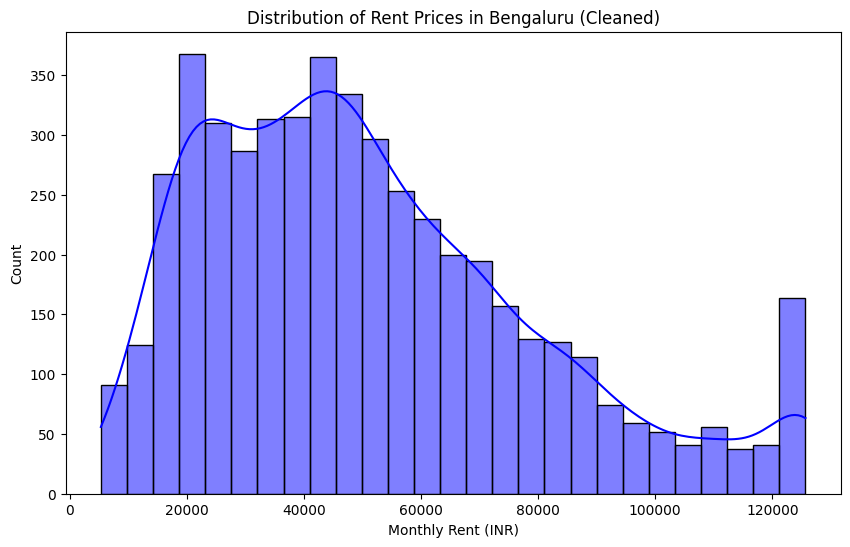

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated path to match your data folder structure
file_path = '../data/cleaned_data.csv'
df = pd.read_csv(file_path)

print("Dataset Summary:")
print(df[['total_sqft', 'size_bhk', 'rent_price_inr_per_month']].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['rent_price_inr_per_month'], kde=True, color='blue')
plt.title('Distribution of Rent Prices in Bengaluru (Cleaned)')
plt.xlabel('Monthly Rent (INR)')
plt.show()

## co-relation analysis

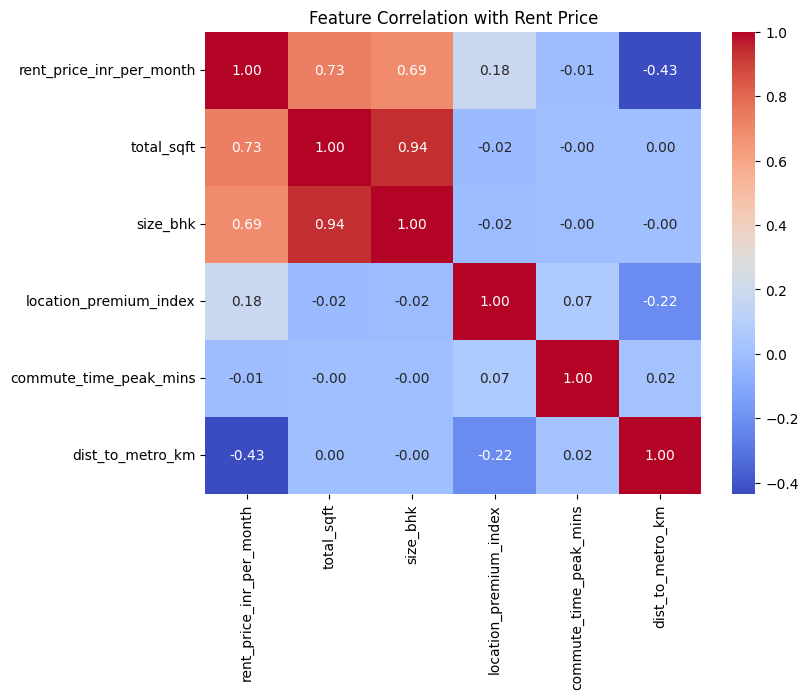

In [6]:
# Focus on your engineered location_premium_index and core features
cols_to_check = [
    'rent_price_inr_per_month', 'total_sqft', 'size_bhk', 
    'location_premium_index', 'commute_time_peak_mins', 'dist_to_metro_km'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[cols_to_check].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Rent Price')
plt.show()

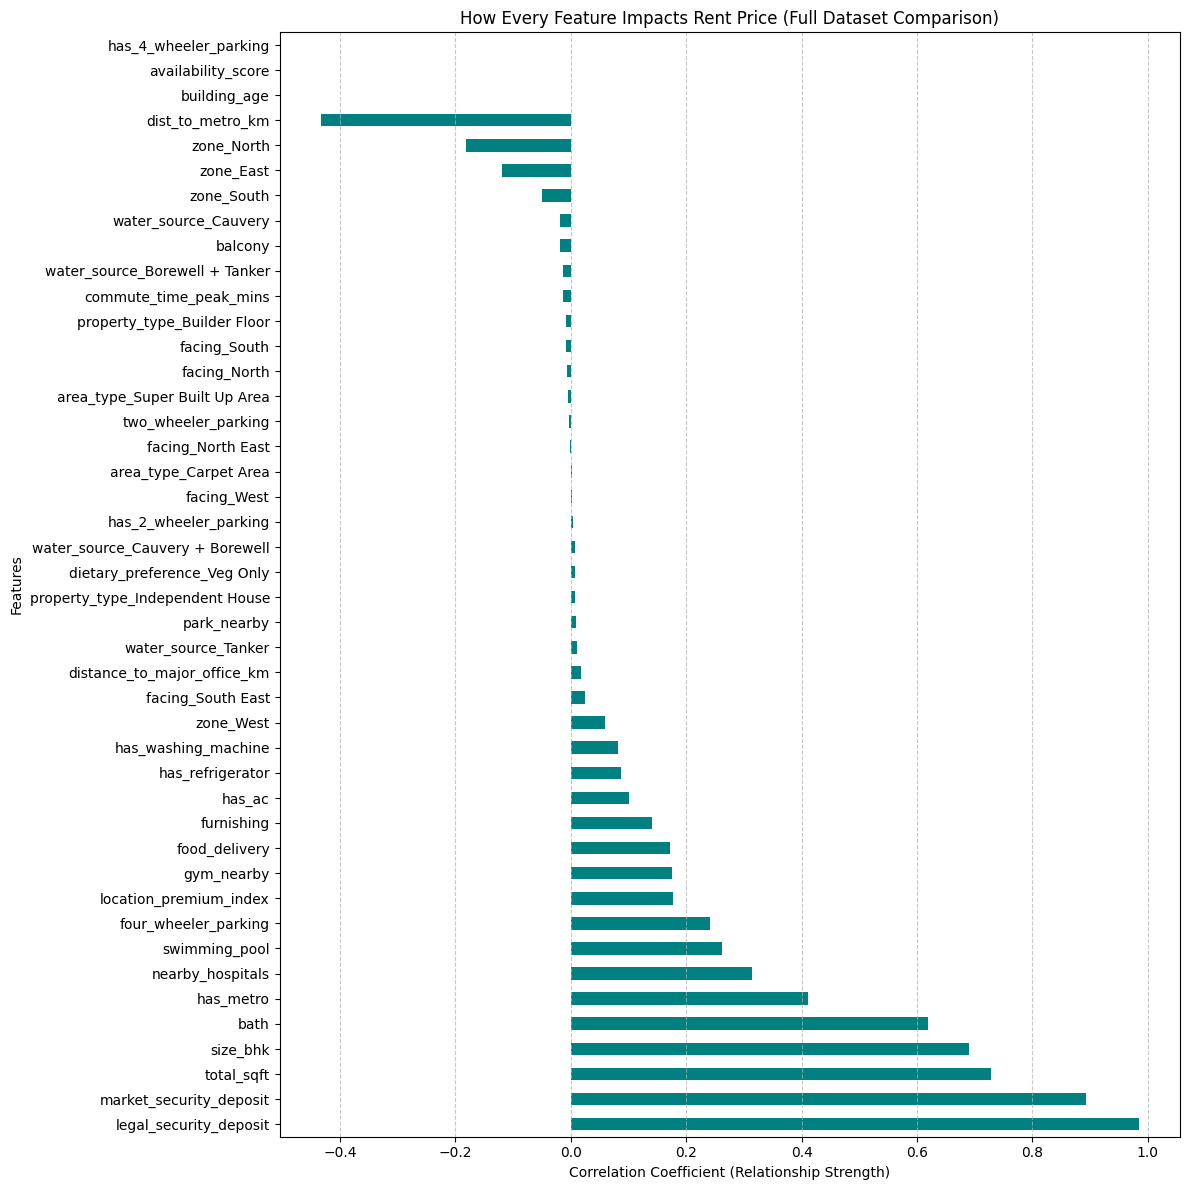

Hidden Drivers (Top Correlations excluding Size):
legal_security_deposit     0.984888
market_security_deposit    0.892425
total_sqft                 0.728346
size_bhk                   0.689629
bath                       0.619401
has_metro                  0.411165
nearby_hospitals           0.314131
swimming_pool              0.261121
four_wheeler_parking       0.241284
location_premium_index     0.176781
Name: rent_price_inr_per_month, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full cleaned data
file_path = '../data/cleaned_data.csv'
df = pd.read_csv(file_path)

# 1. Calculate correlation for ALL columns
# Then, specifically look at the relationship with Rent
full_correlation = df.corr()['rent_price_inr_per_month'].sort_values(ascending=False)

# 2. Drop the target itself (Rent vs Rent is always 1.0)
full_correlation = full_correlation.drop('rent_price_inr_per_month')

# 3. Visualize the Comparison
plt.figure(figsize=(12, 12))
full_correlation.plot(kind='barh', color='teal')
plt.title('How Every Feature Impacts Rent Price (Full Dataset Comparison)')
plt.xlabel('Correlation Coefficient (Relationship Strength)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Print the "Surprise" drivers for your manager
print("Hidden Drivers (Top Correlations excluding Size):")
print(full_correlation.head(10))

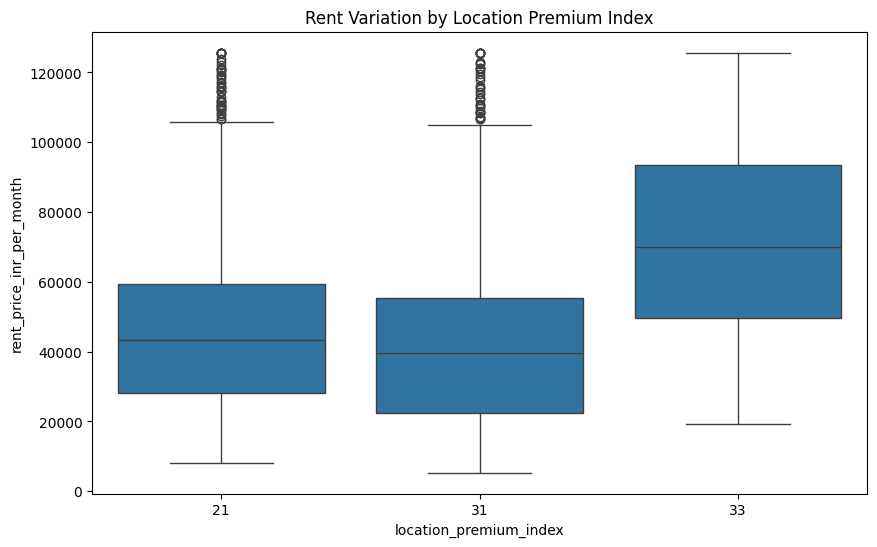

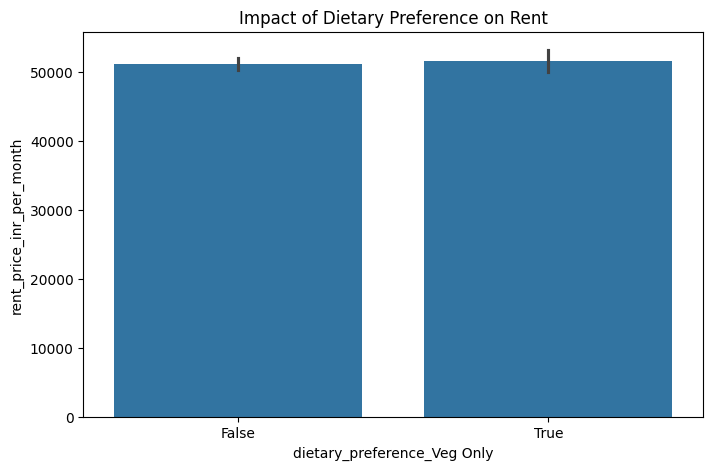

In [8]:
# Visualizing the impact of your engineered Location Index
plt.figure(figsize=(10, 6))
sns.boxplot(x='location_premium_index', y='rent_price_inr_per_month', data=df)
plt.title('Rent Variation by Location Premium Index')
plt.show()

# Visualizing the impact of Dietary Preference (if variance exists)
if 'dietary_preference_Veg Only' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='dietary_preference_Veg Only', y='rent_price_inr_per_month', data=df)
    plt.title('Impact of Dietary Preference on Rent')
    plt.show()

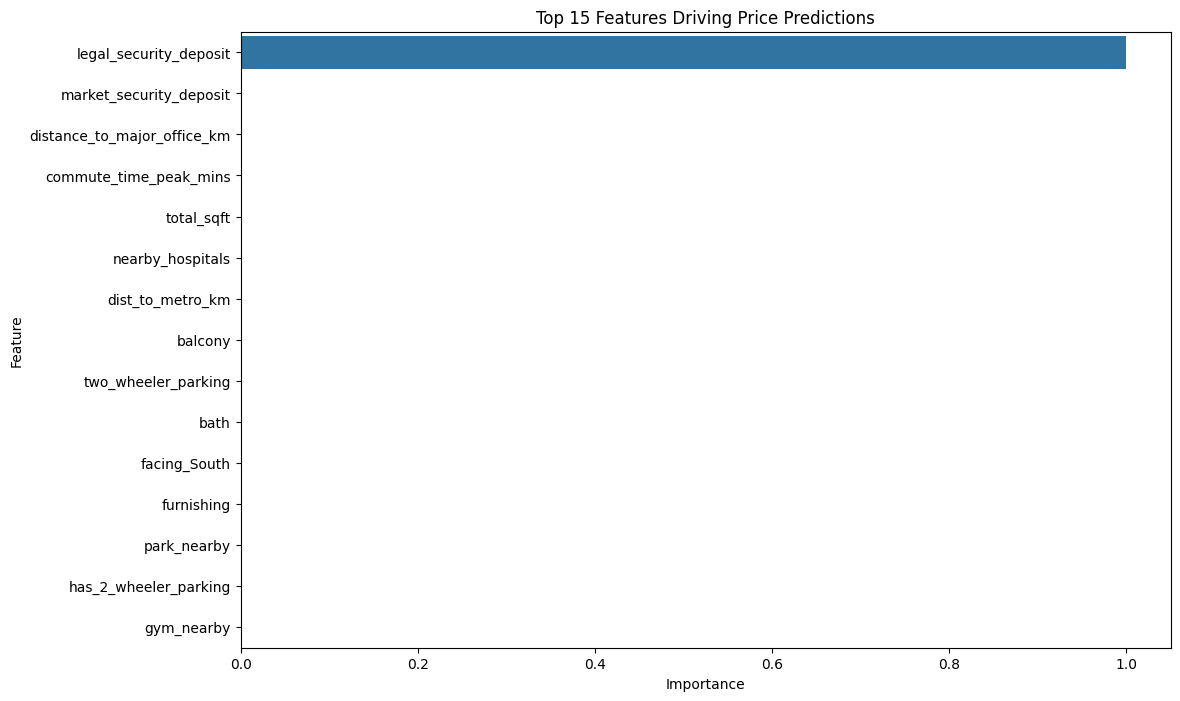

Top 5 Drivers of Rent:
                        Feature    Importance
15       legal_security_deposit  9.999965e-01
16      market_security_deposit  3.512156e-07
6   distance_to_major_office_km  2.828099e-07
18       commute_time_peak_mins  2.801371e-07
1                    total_sqft  2.449554e-07


In [11]:
from sklearn.ensemble import RandomForestRegressor

# X = Features, y = Target
X = df.drop(columns=['rent_price_inr_per_month'])
y = df['rent_price_inr_per_month']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance.head(15))
plt.title('Top 15 Features Driving Price Predictions')
plt.show()

print("Top 5 Drivers of Rent:")
print(importance.head(5))

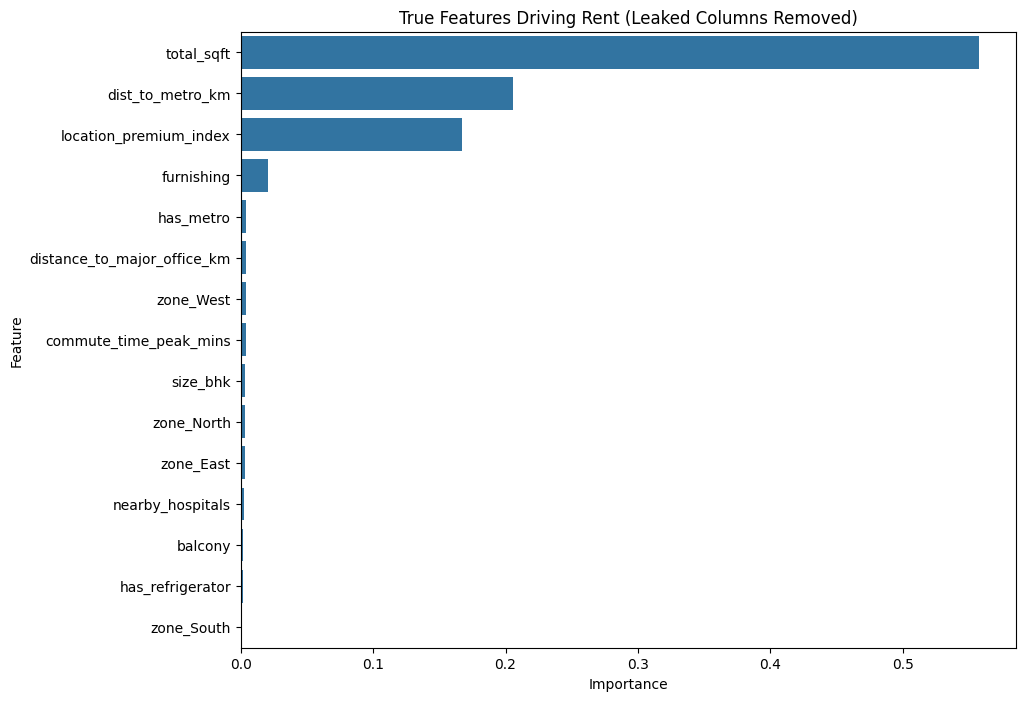

Top 5 True Drivers:
                   Feature  Importance
1               total_sqft    0.557359
14        dist_to_metro_km    0.205969
19  location_premium_index    0.166913
4               furnishing    0.020778
21               has_metro    0.004010


In [12]:
# 1. Drop the "Leaked" features
X_real = df.drop(columns=['rent_price_inr_per_month', 'legal_security_deposit', 'market_security_deposit'])
y = df['rent_price_inr_per_month']

# 2. Re-train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_real, y)

# 3. Get the REAL importance
importance_real = pd.DataFrame({
    'Feature': X_real.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 4. Plot the "Clean" insights
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_real.head(15))
plt.title('True Features Driving Rent (Leaked Columns Removed)')
plt.show()

print("Top 5 True Drivers:")
print(importance_real.head(5))